In [20]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

In [21]:
images = "./drive/MyDrive/Major Project/Final"
y = pd.read_csv("./drive/MyDrive/Major Project/Data3D.csv")

In [22]:
a = os.listdir(images)
a.sort()

In [23]:
img_size = 64

In [24]:
path = images
data1 = []
data2 = []
for img in a[:3048]:
    pic = cv2.imread(os.path.join(path,img))
    pic2 = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic1 = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)
    # pic1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    pic1 = cv2.resize(pic1,(img_size,img_size))
    pic2 = cv2.resize(pic2,(img_size,img_size))
    data1.append([pic1])
    data2.append([pic2])

In [25]:
np.array(data1).shape

(3048, 1, 64, 64)

In [26]:
datagray = np.array(data1)
datagray = np.squeeze(datagray)
datagray.shape

(3048, 64, 64)

In [27]:
datargb = np.array(data2)
datargb = np.squeeze(datargb)
datargb.shape

(3048, 64, 64, 3)

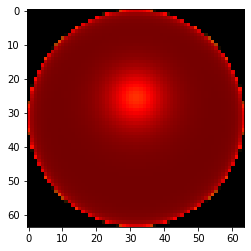

In [28]:
plt.imshow(datargb[5].reshape(img_size, img_size,3))

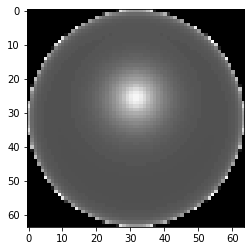

In [29]:
plt.imshow(datagray[5], cmap='gray')

In [30]:
datagray = datagray.reshape(-1, img_size, img_size, 1)
datargb = datargb.reshape(-1, img_size, img_size, 3)

In [31]:
y.drop('label', inplace=True, axis=1)

In [32]:
datagray.shape, datargb.shape, y.shape

((3048, 64, 64, 1), (3048, 64, 64, 3), (3048, 4))

In [34]:
from sklearn.model_selection import train_test_split
train_Xgray,test_Xgray,train_ygray,test_ygray = train_test_split(datagray,y, test_size=0.2, random_state=13)
train_Xrgb,test_Xrgb,train_yrgb,test_yrgb = train_test_split(datargb,y, test_size=0.2, random_state=13)

In [35]:
from keras.layers import Dense, Conv2D, Flatten

In [36]:
# For grayscale

model1 = Sequential()
model1.add(Conv2D(64, 3, activation="relu", input_shape=(img_size,img_size, 1), kernel_initializer='he_uniform'))
model1.add(Flatten())
model1.add(Dense(16, activation="relu"))
model1.add(Dense(4))
model1.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        640       
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 16)                3936272   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
Total params: 3,936,980
Trainable params: 3,936,980
Non-trainable params: 0
_________________________________________________________________


In [38]:
# For rgb

model2 = Sequential()
model2.add(Conv2D(64, 3, activation="relu", input_shape=(img_size,img_size, 3), kernel_initializer='he_uniform'))
model2.add(Flatten())
model2.add(Dense(16, activation="relu"))
model2.add(Dense(4))
model2.compile(loss="mse", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                3936272   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 68        
Total params: 3,938,132
Trainable params: 3,938,132
Non-trainable params: 0
_________________________________________________________________


In [39]:
model1.fit(train_Xgray, train_ygray, batch_size=20,epochs=50, verbose=0)

In [40]:
model2.fit(train_Xrgb, train_yrgb, batch_size=20,epochs=50, verbose=0)

In [74]:
ypred1 = pd.DataFrame(model1.predict(test_Xgray), columns = ['diameter', 'x', 'y', 'z'])
ypred2 = pd.DataFrame(model2.predict(test_Xrgb), columns = ['diameter', 'x', 'y', 'z'])

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
import math
import statistics

In [76]:
#for Grayscale
print('Grayscale')
for col in y:
  print(col)
  print('r2_score: ', r2_score(test_ygray[col], ypred1[col]))
  rmse = math.sqrt(mean_squared_error(test_ygray[col], ypred1[col]))
  print('rmse: ', rmse)
  print('rrmse: ', rmse/np.mean(ypred1[col]))
  print(' ')

Grayscale
diameter
r2_score:  -2.3170063245760706
rmse:  1.4310880295212427
rrmse:  1.8362936089375765
 
x
r2_score:  -0.00010926456352389202
rmse:  2.2934832637738674
rrmse:  425.4132636621626
 
y
r2_score:  -0.0056173233503962194
rmse:  2.448893563515934
rrmse:  311.34164393361056
 
z
r2_score:  -2.1638699249860243
rmse:  2.4605808284066244
rrmse:  0.9721758144378396
 


In [77]:
#for rgb
print('RGB')
for col in y:
  print(col)
  print('r2_score: ', r2_score(test_yrgb[col], ypred2[col]))
  rmse = math.sqrt(mean_squared_error(test_yrgb[col], ypred2[col]))
  print('rmse: ', rmse)
  print('rrmse: ', rmse/np.mean(ypred2[col]))
  print(' ')

RGB
diameter
r2_score:  -4.386935195073193
rmse:  1.8237448341478224
rrmse:  5.532859614250873
 
x
r2_score:  -8.319968125980459e-05
rmse:  2.2934533771590435
rrmse:  981.1891731292488
 
y
r2_score:  -0.005820472192559434
rmse:  2.4491409064952196
rrmse:  219.73812565202462
 
z
r2_score:  -8.513147374174965
rmse:  4.266683596209009
rrmse:  8.055000338958875
 
